<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=550 height=450/></p>

<h3 style="text-align: center;"><b>"Глубокое обучение". Продвинутый поток</b></h3>

<h2 style="text-align: center;"><b>Семинар 6. Основы библиотеки PyTorch </b></h2>


<p style="align: center;"><img src="https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png" width=400 height=100></p>

Этот ноутбук посвящён основам  библиотеки PyTorch.

<h3 style="text-align: center;"><b>Введение</b></h3>

В настоящее время существует множество фреймворков глубокого обучения. Разница между ними заключается во внутренних принципах вычислений. Например, в **[Caffe](http://caffe.berkeleyvision.org/)** и **[Caffe2](https://caffe2.ai/)** вы пишете код, используя некоторые «готовые блоки» "(как и $ LEGO ^ {TM} $ :). В **[TensorFlow](https://www.tensorflow.org/)** и **[Theano](http://deeplearning.net/software/theano/)** вы сначала объявляете граф вычислений, затем компилируйте его и используйте для вывода / обучения (`tf.session ()`). Кстати, теперь в TensorFlow (начиная с версии 1.10) есть функция [Eager Execution](https://www.tensorflow.org/guide/eager), которая может быть полезна для быстрого прототипирования и отладки. **[Keras](https://keras.io/)** - очень популярный и полезный фреймворк DL, который позволяет быстро реализовывать нейронный сети и имеет множество полезных функций.


<p style="align: center;"><img src="https://habrastorage.org/web/e3e/c3e/b78/e3ec3eb78d714a7993a6b922911c0866.png" width=500 height=500></p>  
<p style="text-align: center;"><i>Image credit: https://habr.com/post/334380/</i><p>

Мы будем использовать **PyTorch**, поскольку он активно развивается и поддерживается AI-сообществом

<h3 style="text-align: center;"><b>Установка</b></h3>

Подробную инструкцию по установке PyTorch вы можете найти на [официальном сайте PyTorch](https://pytorch.org/).

## Синтаксис Фреймворка

In [ ]:
import torch

Несколько фактов о PyTorch:
- динамический граф вычислений
- удобные модули `torch.nn` и `torchvision` для быстрого прототипирования нейронных сетей
- даже быстрее, чем TensorFlow на некоторых задачах
- позволяет легко использовать **GPU**

По своей сути PyTorch предоставляет две основные функции:

- n-мерный тензор, похожий на **numpy**, но может работать на графических процессорах
- Автоматическая дифференциация для построения и обучения нейронных сетей

Если бы PyTorch был формулой, она была бы такой:

$$PyTorch = NumPy + CUDA + Autograd$$

(CUDA - [wiki](https://en.wikipedia.org/wiki/CUDA))

Давайте посмотрим, как мы можем использовать PyTorch для работы с векторами и тензорами.

Напомним, что **тензор** - это многомерный вектор, например :

`x = np.array ([1,2,3])` - вектор = тензор с 1 размерностью (точнее: `(3,)`)

`y = np.array ([[1, 2, 3], [4, 5, 6]])` - матрица = тензор с двумя измерениями (`(2, 3)` в данном случае)

`z = np.array ([[[1, 2, 3], [4, 5, 6], [7, 8, 9]]],
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]]]) `-" куб "(3, 3, 3) = тензор с тремя измерениями (` ( 3, 3, 3) `в этом случае)


Одним из реальных примеров трехмерного тензора является **изображение**, оно имеет 3 измерения: `высота`, `ширина` и `глубина канала` (глубина канала = 3 для цветных изображений, 1 для оттенков серого). Вы можете думать об этом как о параллелепипеде, состоящем из действительных чисел.


### Типы Тензоров

В PyTorch мы будем использовать `torch.Tensor` (`FloatTensor`, `IntTensor`, `ByteTensor`) для всех вычислений.

Все типы:

In [ ]:
torch.HalfTensor      # 16 бит, floating point
torch.FloatTensor     # 32 бита, floating point
torch.DoubleTensor    # 64 бита, floating point

torch.ShortTensor     # 16 бит, integer, signed
torch.IntTensor       # 32 бита, integer, signed
torch.LongTensor      # 64 бита, integer, signed

torch.CharTensor      # 8 бит, integer, signed
torch.ByteTensor      # 8 бит, integer, unsigned

torch.ByteTensor

Мы будем использовать только `torch.FloatTensor()` и `torch.IntTensor()`.

Начнем уже что-нибудь писать!

### Создание тензора

In [ ]:
a = torch.FloatTensor([1, 2])
a


tensor([1., 2.])

In [ ]:
a.shape

torch.Size([2])

In [ ]:
b = torch.FloatTensor([[1,2,3], [4,5,6]])
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
b.shape

torch.Size([2, 3])

In [ ]:
x = torch.FloatTensor(2,3,4)

In [ ]:
x

tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 1.4013e-45, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 1.4013e-45, 0.0000e+00]]])

In [ ]:
x = torch.FloatTensor(100)
x

tensor([8.4226e-03, 4.3310e-41, 8.4226e-03, 4.3310e-41, 4.4842e-44, 0.0000e+00,
        8.9683e-44, 0.0000e+00, 6.4653e-10, 3.0904e-41, 1.4128e+08, 3.0900e-41,
        0.0000e+00, 1.1755e-38, 1.4128e+08, 3.0900e-41, 2.0000e+00, 0.0000e+00,
        1.3761e+11, 3.0900e-41, 0.0000e+00, 0.0000e+00, 9.1084e-44, 0.0000e+00,
        1.4276e+11, 3.0900e-41, 1.4243e+11, 3.0900e-41, 1.4202e+11, 3.0900e-41,
        4.6243e-44, 0.0000e+00, 1.4276e+11, 3.0900e-41, 8.4221e-03, 4.3310e-41,
        2.2421e-43, 0.0000e+00, 1.1210e-43, 0.0000e+00, 6.4582e-10, 3.0904e-41,
        6.0536e-43, 0.0000e+00, 4.2039e-45, 0.0000e+00, 5.6179e+14, 4.3309e-41,
        1.6275e+08, 3.0900e-41, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.4803e-43, 0.0000e+00,
        1.4276e+11, 3.0900e-41, 8.4221e-03, 4.3310e-41, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+

In [ ]:
x = torch.IntTensor(45, 57, 14, 2)
x.shape

torch.Size([45, 57, 14, 2])

**Примечание:** если вы создаете `torch.Tensor` с помощью следующего конструктора, он будет заполнен мусором из "случайных номеров":

In [ ]:
x = torch.IntTensor(3, 2, 4)
x

tensor([[[1376028256,      22051, 1348959888,      22051],
         [1474594992,      30906,          0,          0]],

        [[         0,          0,          0,          0],
         [         0,          0,          0,          0]],

        [[         0,          0,          1,          0],
         [         0,          0,          0,          0]]], dtype=torch.int32)

### Инициализации тензоров

In [ ]:
x1 = torch.FloatTensor(3, 2, 4)
x1.zero_()
x2 = torch.zeros(3, 2, 4)
x3 = torch.zeros_like(x1)

assert torch.allclose(x1, x2) and torch.allclose(x1, x3)

Инициализация случайного распределения

In [ ]:
x = torch.randn((2,3))                # Normal(0, 1) с размером (2, 3)
x

tensor([[-1.1594,  1.7796, -0.4885],
        [-1.7413, -0.5075,  1.3931]])

In [ ]:
x.random_(0, 10)                      # Дискретное равномерно U[0, 10]
x.uniform_(0, 1)                      # Равномерно U[0, 1]
x.normal_(mean=0, std=1)              # Нормальное со средним 0 и дисперсией 1
x.bernoulli_(p=0.5)                   # bernoulli with parameter p

tensor([[1., 0., 0.],
        [0., 1., 0.]])

## Функции в Torch

У всех функций Numpy есть своя пара в Torch! Осталось теперь вспомнить numpy 🙂

https://github.com/torch/torch7/wiki/Torch-for-Numpy-users

### Изменение формы
`np.reshape()` == `torch.view()`:

In [ ]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
b.view(3, 2).shape

torch.Size([3, 2])

In [ ]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
b, b.stride()

(tensor([[1., 2., 3.],
         [4., 5., 6.]]),
 (3, 1))

In [ ]:
b.view(3, 2), b.view(3, 2).stride()

(tensor([[1., 2.],
         [3., 4.],
         [5., 6.]]),
 (2, 1))

**Примечание:** `torch.view ()` создает новый тензор, но старый остается неизменным

In [ ]:
b.view(-1, 2)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [ ]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
b.T.stride(), b.is_contiguous(), b.T.is_contiguous()

((1, 3), True, False)

<img src='https://lh3.googleusercontent.com/proxy/pbQ8C9YLVguU2LzlfE2-57lC3KK3yIRsQnpaTOK9S2UPpopvnZ3JhgeMcT6_kqYL56xq18ZFqddzPhszZg1W9YY--y-qDD2-bJrjVYivMdpQgRqiumwh6PpJYU3cL5Mua9RNeVp6xK0'>

In [ ]:
b.reshape(-1) # возвращает view или contigues тензор

tensor([1., 2., 3., 4., 5., 6.])

In [ ]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

### Изменение типа тензора

In [ ]:
a = torch.FloatTensor([1.5, 3.2, -7])

In [ ]:
a.type_as(torch.IntTensor())

tensor([ 1,  3, -7], dtype=torch.int32)

In [ ]:
a.to(torch.int32)

tensor([ 1,  3, -7], dtype=torch.int32)

In [ ]:
a.type_as(torch.ByteTensor())

tensor([  1,   3, 249], dtype=torch.uint8)

In [ ]:
a.to(torch.uint8)

tensor([  1,   3, 249], dtype=torch.uint8)

**Note:** `.type_as()` creates a new tensor, the old one remains unchanged

In [ ]:
a

tensor([ 1.5000,  3.2000, -7.0000])

* Indexing is just like in `NumPy`:

In [ ]:
a = torch.FloatTensor([[100, 20, 35], [15, 163, 534], [52, 90, 66]])
a

tensor([[100.,  20.,  35.],
        [ 15., 163., 534.],
        [ 52.,  90.,  66.]])

In [ ]:
a[0, 0]

tensor(100.)

In [ ]:
a[0:2, 1]

tensor([ 20., 163.])

### Арифметические операции

| операция | аналоги |
|:-:|:-:|
|`+`| `torch.add()` |
|`-`| `torch.sub()` |
|`*`| `torch.mul()` |
|`/`| `torch.div()` |

#### Сложение

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [ ]:
a + b

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [ ]:
a.add(b)

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [ ]:
b = -a
b

tensor([[  -1.,   -2.,   -3.],
        [ -10.,  -20.,  -30.],
        [-100., -200., -300.]])

In [ ]:
a + b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

#### Вычитание

In [ ]:
a - b

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

In [ ]:
a.sub(b) # copy

tensor([[  3.,   6.,   9.],
        [ 30.,  60.,  90.],
        [300., 600., 900.]])

In [ ]:
a.sub_(b) # inplace

tensor([[   4.,    8.,   12.],
        [  40.,   80.,  120.],
        [ 400.,  800., 1200.]])

#### Умножение (поэлементное)

In [ ]:
a * b

tensor([[-4.0000e+00, -1.6000e+01, -3.6000e+01],
        [-4.0000e+02, -1.6000e+03, -3.6000e+03],
        [-4.0000e+04, -1.6000e+05, -3.6000e+05]])

In [ ]:
a.mul(b)

tensor([[-4.0000e+00, -1.6000e+01, -3.6000e+01],
        [-4.0000e+02, -1.6000e+03, -3.6000e+03],
        [-4.0000e+04, -1.6000e+05, -3.6000e+05]])

#### Деление (поэлементное):

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [ ]:
a / b

tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [ 1.,  1.,  1.]])

In [ ]:
a.div(b)

tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [ 1.,  1.,  1.]])

**Примечание:** все эти операции создают новые тензоры, старые тензоры остаются неизменными.

In [ ]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [ ]:
b

tensor([[ -1.,  -2.,  -3.],
        [-10., -20., -30.],
        [100., 200., 300.]])

### Операторы сравнения

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [ ]:
a == b

tensor([[False, False, False],
        [False, False, False],
        [ True,  True,  True]])

In [ ]:
a != b

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [False, False, False]])

In [ ]:
a < b

tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])

In [ ]:
a > b

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [False, False, False]])

### Использование индексации по логической маске

In [ ]:
a[a > b]

tensor([ 1.,  2.,  3., 10., 20., 30.])

In [ ]:
b[a == b]

tensor([100., 200., 300.])

### Поэлементное применение **универсальных функций**

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])

In [ ]:
a.sin()

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [ ]:
torch.sin(a)

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [ ]:
a.tan()

tensor([[ 1.5574, -2.1850, -0.1425],
        [ 0.6484,  2.2372, -6.4053],
        [-0.5872, -1.7925, 45.2447]])

In [ ]:
a.exp()

tensor([[2.7183e+00, 7.3891e+00, 2.0086e+01],
        [2.2026e+04, 4.8517e+08, 1.0686e+13],
        [       inf,        inf,        inf]])

In [ ]:
a.log()

tensor([[0.0000, 0.6931, 1.0986],
        [2.3026, 2.9957, 3.4012],
        [4.6052, 5.2983, 5.7038]])

In [ ]:
b = -a
b

tensor([[  -1.,   -2.,   -3.],
        [ -10.,  -20.,  -30.],
        [-100., -200., -300.]])

In [ ]:
b.abs()

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

### Агрегация и работа с осями
#### sum, mean, max, min:

In [ ]:
a.sum(dim=1)

tensor([  6.,  60., 600.])

In [ ]:
a.mean()

tensor(74.)

#### Применение функции вдоль оси

In [ ]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [ ]:
a.sum(dim=0)

tensor([111., 222., 333.])

In [ ]:
a.sum(dim=1)

tensor([  6.,  60., 600.])

In [ ]:
a.max()

tensor(300.)

In [ ]:
a.max(0)

torch.return_types.max(
values=tensor([100., 200., 300.]),
indices=tensor([2, 2, 2]))

**Примечание:** второй тензор, возвращаемый `.max()`, содержит индексы элементов max вдоль этой оси. Например. в этом случае `a.max ()` вернула `(100, 200, 300)`, которые являются минимальными элементами по оси 0 (вдоль столбцов), а их индексы по оси 0 равны `(2, 2, 2)`.


#### Фиктивные оси

Иногда очень сложно бывает разобраться, как правильно выбрать оси для применения операций с многомерными массивами. Поэтому сейчас мы решим на эту тему пару задач.
Сначала посмотрим, как создавать у массивов новые фиктивные оси, это нам пригодится.

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])

a[:, None, :].shape

torch.Size([3, 1, 3])

In [ ]:
a[:, :, None]

tensor([[[  1.],
         [  2.],
         [  3.]],

        [[ 10.],
         [ 20.],
         [ 30.]],

        [[100.],
         [200.],
         [300.]]])

#### Безобидная задача на кумулятивные суммы
Дана матрица $M \times N$. Напишите функцию, которая возвращает вектор средних значений по вертикали.



In [ ]:
def vertical_means(A):
    """
    param A: torch.tensor[m,n]
    """

    result = A.mean(dim=0)

    return result

A = torch.FloatTensor([[1, 4],
                       [2, 7]] )

vertical_means(A)

tensor([1.5000, 5.5000])

**Проблемы:**

* Что такое вертикальная ось?
* По какой оси необходимо суммировать?
* Как не ошибиться?

**Ответ:** Операции всегда производятся по той оси, которая **исчезнет** после применения операции.

#### Задача на нормализацию изображения
Реализуйте функцию ``normalize_pictures(A)``, которая принимает на вход четырёхмерный тензор --- батч из ``batch_size`` изображений, каждое из которых является трехмерным тензором формы (num_channels, width, height). Нужно стандартизировать изображение по каждому каналу, то есть сделать так, чтобы среднее значение яркости каждого канала (по всем изображениям и всем пикселям) было равно 0, а стандартное отклонение --- 1.

In [ ]:
def normalize_pictures(A):
    """
    param A: torch.Tensor[batch_size, num_channels, width, height]
    """

    m = A.mean(dim=(2,3))
    sigma = A.std(dim=(2, 3))

    result = (A - m[:, :, None, None])/sigma[:, :, None, None]


    return result

In [ ]:
batch = torch.randint(0, 156, (64, 3, 300, 300), dtype=torch.float32)
batch.mean(dim=(2,3)).shape

torch.Size([64, 3])

In [ ]:
batch = torch.randint(0, 256, (64, 3, 300, 300), dtype=torch.float32)

B = normalize_pictures(batch)
# print(B.mean(dim=(2,3)).shape)
# print(B.std(dim=(2,3)))

## Матричные операции

#### Транспонирование тензора

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [ ]:
a.t()

tensor([[  1.,  10., 100.],
        [  2.,  20., 200.],
        [  3.,  30., 300.]])

Это тоже не inplace-операция:

In [ ]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

#### Скалярное произведение векторов

In [ ]:
a = torch.FloatTensor([1, 2, 3, 4, 5, 6])
b = torch.FloatTensor([-1, -2, -4, -6, -8, -10])

In [ ]:
a.dot(b)

tensor(-141.)

In [ ]:
a.shape, b.shape

(torch.Size([6]), torch.Size([6]))

In [ ]:
a @ b

tensor(-141.)

In [ ]:
type(a)

torch.Tensor

In [ ]:
type(b)

torch.Tensor

In [ ]:
type(a @ b)

torch.Tensor

#### Матричное произведение

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [ ]:
a.mm(b)

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

In [ ]:
a @ b

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1], [-10], [100]])

In [ ]:
print(a.shape, b.shape)

torch.Size([3, 3]) torch.Size([3, 1])


In [ ]:
a @ b

tensor([[  279.],
        [ 2790.],
        [27900.]])

Тензор `b` можно развернуть в одномерный массив с помощью функции `torch.view(-1)`, чтобы результат был вектором

In [ ]:
b

tensor([[ -1.],
        [-10.],
        [100.]])

In [ ]:
b.view(-1)

tensor([ -1., -10., 100.])

In [ ]:
a @ b.view(-1)

tensor([  279.,  2790., 27900.])

In [ ]:
a.mv(b.view(-1))

tensor([  279.,  2790., 27900.])

In [ ]:
y = torch.Tensor(2, 3, 4, 5)
z = torch.Tensor(2, 3, 5, 6)
(y @ z).shape

torch.Size([2, 3, 4, 6])

## Конвертация
#### Конвертация из Numpy в Pytorch:

In [ ]:
import numpy as np

a = np.random.rand(3, 3)
a

array([[0.75052338, 0.92612919, 0.87369247],
       [0.33028442, 0.32426834, 0.85713096],
       [0.44174006, 0.46396628, 0.4983828 ]])

In [ ]:
b = torch.from_numpy(a)
b

tensor([[0.7505, 0.9261, 0.8737],
        [0.3303, 0.3243, 0.8571],
        [0.4417, 0.4640, 0.4984]], dtype=torch.float64)

**Внимание!** `a` и `b` хранятся в одной и той же ячейке данных. Если именить один тензор, то изменится и другой.

In [ ]:
b -= b
b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [ ]:
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### Конвертация из Torch в Numpy

In [ ]:
a = torch.FloatTensor(2, 3, 4)
a

tensor([[[1.4245e+11, 3.0900e-41, 1.4494e+11, 3.0900e-41],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 1.4013e-45, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 1.1351e-43, 0.0000e+00],
         [1.4513e+11, 3.0900e-41, 8.4222e-03, 4.3310e-41],
         [1.4013e-45, 0.0000e+00, 1.4013e-45, 0.0000e+00]]])

In [ ]:
type(a)

torch.Tensor

In [ ]:
x = a.numpy()
x

array([[[1.4244538e+11, 3.0900032e-41, 1.4493811e+11, 3.0900032e-41],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 1.4012985e-45, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 1.1350518e-43, 0.0000000e+00],
        [1.4512659e+11, 3.0900032e-41, 8.4221661e-03, 4.3309932e-41],
        [1.4012985e-45, 0.0000000e+00, 1.4012985e-45, 0.0000000e+00]]],
      dtype=float32)

In [ ]:
x.shape

(2, 3, 4)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x -= x

In [ ]:
a

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

#### Задание. Реализация функции forward
Реализуйте функцию `forward_pass(X, w)` для одного нейрона нейронной сети с активацией ``sigmoid``. Используйте библиотеку PyTorch

<img src='https://radioprog.ru/uploads/media/articles/0001/05/267ad35a9e64a7b92c2e3b94940f686816ea6bf8.jpeg'>

In [ ]:
def forward_pass(X, w):

  logits = X @ w
  result  = torch.sigmoid(logits)

  return result


In [ ]:
X = torch.FloatTensor([[-5, 5], [2, 3], [1, -1]])
print(X.shape)
w = torch.FloatTensor([[-0.5], [2.5]])
print(w.shape)
result = forward_pass(X, w)
print('result: {}'.format(result))

torch.Size([3, 2])
torch.Size([2, 1])
result: tensor([[1.0000],
        [0.9985],
        [0.0474]])


## <h1 style="text-align: center;"><a href="https://ru.wikipedia.org/wiki/CUDA">CUDA</a></h3>

CUDA --- это программно-аппаратная архитектура параллельных вычислений, которая позволяет существенно увеличить вычислительную производительность благодаря использованию графических процессоров фирмы Nvidia. Для нас CUDA --- это драйвер, который позволяет нам проводить вычисления на GPU.

[CUDA documentation](https://docs.nvidia.com/cuda/)

Для вычислений на Pytorch мы можем использовать как CPU (Central Processing Unit), так и GPU (Graphical Processing Unit). Между ними можно легко переключаться, и это очень важно!

In [ ]:
x = torch.FloatTensor(1024, 1024).uniform_()
x

tensor([[0.5853, 0.6888, 0.2374,  ..., 0.1209, 0.1896, 0.4591],
        [0.1650, 0.5218, 0.5117,  ..., 0.0170, 0.4990, 0.1828],
        [0.0267, 0.5305, 0.4651,  ..., 0.5461, 0.7696, 0.9497],
        ...,
        [0.0244, 0.9223, 0.3117,  ..., 0.0712, 0.2066, 0.8896],
        [0.4456, 0.5338, 0.9938,  ..., 0.4575, 0.1281, 0.7308],
        [0.9712, 0.7843, 0.6945,  ..., 0.4949, 0.7450, 0.8932]])

In [ ]:
x.is_cuda

False

#### Кладём тензор на GPU

In [ ]:
!nvidia-smi

Mon Oct 23 18:22:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
x = x.cuda()

In [ ]:
!nvidia-smi

Mon Oct 23 18:22:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    28W /  70W |    123MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
x

tensor([[0.5853, 0.6888, 0.2374,  ..., 0.1209, 0.1896, 0.4591],
        [0.1650, 0.5218, 0.5117,  ..., 0.0170, 0.4990, 0.1828],
        [0.0267, 0.5305, 0.4651,  ..., 0.5461, 0.7696, 0.9497],
        ...,
        [0.0244, 0.9223, 0.3117,  ..., 0.0712, 0.2066, 0.8896],
        [0.4456, 0.5338, 0.9938,  ..., 0.4575, 0.1281, 0.7308],
        [0.9712, 0.7843, 0.6945,  ..., 0.4949, 0.7450, 0.8932]],
       device='cuda:0')

In [ ]:
x = x.cpu()
!nvidia-smi

torch.cuda.empty_cache()
!nvidia-smi

Mon Oct 23 18:23:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    28W /  70W |    141MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

x = x.to(device)
x

tensor([[0.5853, 0.6888, 0.2374,  ..., 0.1209, 0.1896, 0.4591],
        [0.1650, 0.5218, 0.5117,  ..., 0.0170, 0.4990, 0.1828],
        [0.0267, 0.5305, 0.4651,  ..., 0.5461, 0.7696, 0.9497],
        ...,
        [0.0244, 0.9223, 0.3117,  ..., 0.0712, 0.2066, 0.8896],
        [0.4456, 0.5338, 0.9938,  ..., 0.4575, 0.1281, 0.7308],
        [0.9712, 0.7843, 0.6945,  ..., 0.4949, 0.7450, 0.8932]],
       device='cuda:0')

In [ ]:
device

device(type='cuda', index=0)

Умножим два тензора в GPU и вернём результат обратно на CPU:

In [ ]:
a = torch.FloatTensor(10000, 10000).uniform_()
b = torch.FloatTensor(10000, 10000).uniform_()
c = a.cuda().mul(b.cuda()).cpu()

In [ ]:
c

tensor([[0.0546, 0.1700, 0.2309,  ..., 0.4013, 0.0984, 0.7569],
        [0.0606, 0.3081, 0.1748,  ..., 0.1604, 0.0049, 0.2765],
        [0.3049, 0.1724, 0.4934,  ..., 0.0660, 0.0083, 0.0063],
        ...,
        [0.0183, 0.1050, 0.0552,  ..., 0.4958, 0.2964, 0.7698],
        [0.1394, 0.0101, 0.0577,  ..., 0.5387, 0.2837, 0.0072],
        [0.2365, 0.1073, 0.0575,  ..., 0.2394, 0.0145, 0.0669]])

In [ ]:
a

tensor([[0.0809, 0.5597, 0.8352,  ..., 0.8597, 0.6330, 0.8488],
        [0.0618, 0.9495, 0.3722,  ..., 0.4256, 0.0745, 0.2824],
        [0.8757, 0.2565, 0.8295,  ..., 0.3214, 0.0089, 0.1108],
        ...,
        [0.3642, 0.5860, 0.0880,  ..., 0.5990, 0.5205, 0.7804],
        [0.1753, 0.0263, 0.1831,  ..., 0.7652, 0.3356, 0.5513],
        [0.4374, 0.4483, 0.2251,  ..., 0.5477, 0.0158, 0.0983]])

Тензоры из разных областей памяти не совместимы:

In [ ]:
a = torch.FloatTensor(10000, 10000).uniform_().cpu()
b = torch.FloatTensor(10000, 10000).uniform_().cuda()

In [ ]:
a + b

RuntimeError: ignored

### Пример работы на GPU

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
x = torch.FloatTensor(5, 5, 5).uniform_()

# проверить наличие CUDA (NVIDIA GPU)
if torch.cuda.is_available():
    # получить имя устройства CUDA
    device = torch.device('cuda')          # Объект CUDA-устройства
    y = torch.ones_like(x, device=device)  # создаем тензор на GPU
    x = x.to(device)                       # или просто `.to("cuda")`
    z = x + y
    print(z)
    # вы можете установить тип во время операции `.to`
    print(z.to("cpu", torch.double))

tensor([[[1.0447, 1.7777, 1.2038, 1.9318, 1.3566],
         [1.0279, 1.4194, 1.2522, 1.9197, 1.1085],
         [1.0912, 1.1117, 1.9366, 1.5003, 1.6382],
         [1.6238, 1.3930, 1.5229, 1.0677, 1.9415],
         [1.4562, 1.8186, 1.7154, 1.9006, 1.5710]],

        [[1.3283, 1.4456, 1.8122, 1.5565, 1.3729],
         [1.2914, 1.6486, 1.9566, 1.1116, 1.6655],
         [1.4936, 1.0108, 1.3772, 1.6165, 1.3670],
         [1.7551, 1.5516, 1.0267, 1.7689, 1.4069],
         [1.9066, 1.0318, 1.8043, 1.0614, 1.4468]],

        [[1.8082, 1.9002, 1.3680, 1.7566, 1.9373],
         [1.2811, 1.4805, 1.9609, 1.5792, 1.8805],
         [1.4313, 1.2170, 1.1559, 1.1445, 1.8745],
         [1.6840, 1.5949, 1.2070, 1.2551, 1.6905],
         [1.3283, 1.8908, 1.1587, 1.9540, 1.8187]],

        [[1.3694, 1.1401, 1.4559, 1.8374, 1.8496],
         [1.8798, 1.2846, 1.8309, 1.8402, 1.9619],
         [1.7413, 1.4391, 1.5666, 1.8814, 1.3421],
         [1.2955, 1.3769, 1.4978, 1.3089, 1.8234],
         [1.5433, 1.1295,

## AutoGrad

За что мы любим PyTorch --- за то, что в нём можно автоматически дифференцировать функции! Об этом можно было бы только мечтать в Numpy. Дифференцирование функций происходит по формуле производной композиции.

**Правило производной композиции (a.k.a. backpropagation)**

Пусть есть функция $f(w(\theta))$. Вычислим её производную:
$${\frac  {\partial{f}}{\partial{\theta}}}
={\frac  {\partial{f}}{\partial{w}}}\cdot {\frac  {\partial{w}}{\partial{\theta}}}$$


*Как рассказывалось на лекции, в многомерном случае можно записать аналог этой формулы:*
$$
D_\theta(f\circ w) = D_{w(\theta)}(f)\circ D_\theta(w)
$$

Простой пример обратного распространения градиента:

$$y = \sin \left(x_2^2(x_1 + x_2)\right)$$

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0010465515004099-gr1.jpg" width=700></img>


Autograd позволяет производить автоматическое дифференцирование для всех операций на тензорах. Граф вычислений, в отличие от Tensorflow, строится динамически. Давайте посмотрим, как это работает.

#### Задание. Реализуйте обучение в логистической регрессии

In [ ]:
# Разберем пример: применим линейную регрессию цен на жилье в Бостоне.

In [ ]:
import matplotlib.pyplot as plt
import torch
%matplotlib inline

from sklearn.datasets import load_boston
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target)

ImportError: ignored

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(data[:, -1] / 10, dtype=torch.float32)
y = torch.tensor(target, dtype=torch.float32)

In [ ]:
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)

# propagete gradients
loss.backward()

In [ ]:
print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-47.3514])
dL/db = 
 tensor([-45.0656])


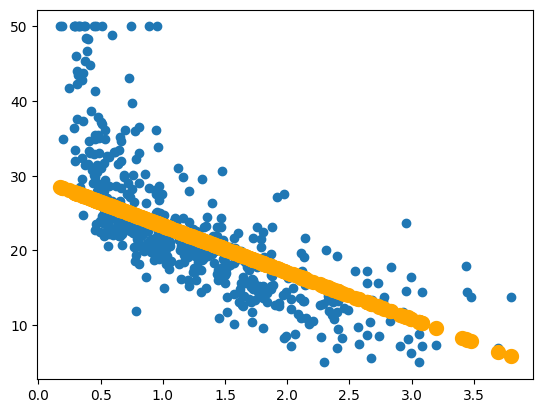

loss =  44.59417


In [ ]:
from IPython.display import clear_output

for i in range(100):

    y_pred = w * x + b

    # Вычисляем функцию ошибок
    loss = torch.mean((y_pred - y)**2)

    # Вычисляем градиенты
    loss.backward()


    # Делаем шаг градиентного спуска по матрице весов
    w.data -= 0.05*w.grad.data
    b.data -= 0.05*b.grad.data

    # обнуляем градиенты
    w.grad.data.zero_()
    b.grad.data.zero_()



    # the rest of code is just bells and whistles
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break

Посмотрим градиенты на примере двухслойной сети

In [ ]:
dtype = torch.float
device = torch.device("cuda:0")
# device = torch.device("cuda:0") # Раскомментируйте это, чтобы запустить на GPU

# N - размер батча; D_in - входной размер;
# H - размер скрытого слоя; D_out - размер вывода.
N, D_in, H, D_out = 64, 3, 3, 10
N, D_in, H, D_out = 64, 3, 3, 10

# Создание случайных тензоров для хранения входных и выходных данных.
# Настройка requires_grad = False указывает, что нам не нужно вычислять градиенты
# по отношению к этим тензорам во время обратного прохода.
x = torch.randn(N, D_in, dtype=dtype)
y = torch.randn(N, D_out, dtype=dtype)

# Создаем тензоры случайных весов.
# Настройка requires_grad = True указывает, что мы хотим вычислять градиенты с
# уважение к этим тензорам во время обратного прохода.

# Create random Tensors for weights.
# Установка requires_grad = True указывает, что мы хотим вычислить градиенты
# относительно этих тензоров во время обратного прохода.
w1 = torch.randn(D_in, H, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, dtype=dtype, requires_grad=True)

In [ ]:
y_pred = (x @ w1).clamp(min=0).matmul(w2)
loss = (y_pred - y).pow(2).sum()

# вычисляем градиенты
loss.backward()

In [ ]:
print((y_pred - y).pow(2).sum())

tensor(3380.4111, grad_fn=<SumBackward0>)


In [ ]:
w1.grad, w2.grad

(tensor([[ -771.7198,   187.2692,  -269.3979],
         [  892.4847,   675.7970,   501.2726],
         [-1610.3036,  -723.7497,   344.2343]]),
 tensor([[-417.8084,  102.0978, -299.6862,  344.6940,    3.1655,   72.7196,
           -90.2550, -260.0746, -605.6832, -151.3133],
         [-193.7872,  133.9986, -144.9486,  279.1934,   15.8342,   60.8595,
          -142.0253, -160.4165, -427.0013,    3.7081],
         [-123.3759,   35.4351,  -90.1589,   42.9376,   62.3250,   18.9306,
           -25.2616,  -18.0523,  -71.9952,   67.0887]]))

In [ ]:
loss.grad # нет доступа к нелистовым градиентам в дереве AD

<ipython-input-15-391fe38783cc>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  loss.grad # нет доступа к нелистовым градиентам в дереве AD


In [ ]:
# заставляем переменную запоминать градиенты фнукции потерь
y_pred = (x @ w1).clamp(min=0).matmul(w2)
y_pred.retain_grad()

loss = (y_pred - y).pow(2).sum()
loss.retain_grad()

loss.backward()

In [ ]:
loss.grad

tensor(1.)

In [ ]:
x.grad # не требует градиента

In [ ]:
y.grad # не требует градиента

**Замечание:** Градиенты помещаются в поле `.grad` тензоров, на которых они вычисляются.

In [ ]:
w1

tensor([[-1.1484,  0.3838, -0.1271],
        [ 0.1406,  0.7242,  0.5593],
        [-1.6771, -0.9956,  0.5924]], requires_grad=True)

In [ ]:
with torch.no_grad():

    pass

## Дополнительные материалы

*1). Official PyTorch tutorials: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py*

*2). arXiv article about the deep learning frameworks comparison: https://arxiv.org/pdf/1511.06435.pdf*

*3). Useful repo with different tutorials: https://github.com/yunjey/pytorch-tutorial*

*4). Facebook AI Research (main contributor of PyTorch) website: https://facebook.ai/developers/tools*